# Similaridade por Cosseno

Neste documento, vamos explorar o conceito de similaridade de documentos por cosseno.

In [1]:
from nltk.corpus import machado
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import string

from collections import defaultdict
from nltk.stem.snowball import PortugueseStemmer
import nltk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vamos começar importando os textos de Machado de Assis

In [2]:
textos = [machado.raw(id) for id in machado.fileids()]
len(textos)

246

In [3]:
tok_textos = [WordPunctTokenizer().tokenize(t.lower()) for t in textos]

In [4]:
len(set(tok_textos[0]))

7483

Depois de tokenizar, vamos extrair o vocabulário dos textos

In [5]:
vocab = set([])
for t in tok_textos:
    vocab = vocab.union(set(t))
#vocab = list(set(vocab))
print(len(vocab))
#vocab

66169


Agora vamos criar uma coleção de textos, para poder utilizar os métods definidos para esta classe.

In [6]:
T = nltk.TextCollection(tok_textos)

In [7]:
T.idf("mão")

0.20701416938432612

In [10]:
T.tf_idf("mão",tok_textos[2])

0.00011540605651963488

In [11]:
T.tf("mão",tok_textos[2])

0.0005574790211842028

Vamos agora fazer uma consulta e tokenizá-la

In [12]:
q = "Lamartine elixir harpa"
qt = WordPunctTokenizer().tokenize(q.lower())

Agora vamos calcular o tfidf dos termos da nossa consulta em cada documento.

In [13]:
tfidf_matrix = np.empty((len(tok_textos),len(qt)))
for j,w in enumerate(qt):
    for i, d in enumerate(tok_textos):
        tfidf_matrix[i,j] = T.tf_idf(w,d)
print(tfidf_matrix.shape)
tfidf_matrix[:3,:]

(246, 3)


array([[4.34449734e-05, 9.51658288e-05, 4.12277118e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Já vimos que a similaridade entre dois cossenos é dada por:

$$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$$

Vamos calcular a norma L2 da matriz de tf-idf:
$||A||_F = \sqrt{\sum_{i} |A_{i}|^2}$

In [14]:
from numpy.linalg import norm
MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tfidf_matrix])
def ordem(q):
    return [np.dot(q,r) for r in MN]
# calculando o tf-idf dos termos na consulta, considerando q um documento da Coleção...
# O que equivale a vetorizar a consulta.
qv = np.array([T.tf_idf(w,qt) for w in qt])
qv /= norm(qv)
r = ordem(qv)
v=filter(lambda x : x[0]!=0.0, zip(r,range(len(tok_textos))))

resposta = sorted(v, reverse=True) 
resposta

[(0.9682890893638976, 185),
 (0.9435141616147088, 0),
 (0.7829790191435612, 4),
 (0.7441638578314829, 217),
 (0.6785027829609526, 193),
 (0.6220481135579361, 238),
 (0.6220481135579361, 229),
 (0.6220481135579361, 138),
 (0.6220481135579361, 85),
 (0.6220481135579361, 41),
 (0.6220481135579361, 32),
 (0.6175088287668101, 222),
 (0.5679531000916818, 232),
 (0.5679531000916818, 194),
 (0.5679531000916818, 176),
 (0.5679531000916818, 152),
 (0.5679531000916818, 125),
 (0.5679531000916818, 16),
 (0.5389669939015386, 240),
 (0.5389669939015386, 218),
 (0.5389669939015386, 216),
 (0.5389669939015386, 186),
 (0.5389669939015386, 184),
 (0.5389669939015386, 165),
 (0.5389669939015386, 147),
 (0.5389669939015386, 139),
 (0.5389669939015386, 80)]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:3672: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


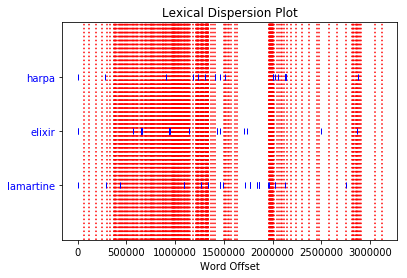

In [22]:
vlines(x=np.cumsum([len(t) for t in tok_textos]),ymin=-1,ymax=40, colors='r', linestyles=':', hold=True);
T.dispersion_plot(qt)

In [23]:
t185 = nltk.Text(WordPunctTokenizer().tokenize(textos[185].lower()))
t185.concordance('elixir')

Displaying 3 of 3 matches:
stas criaturas que trazem consigo o elixir de longa vida e o elixir de longa b
 consigo o elixir de longa vida e o elixir de longa beleza . aos 40 anos inspi
 e conhecimento de cena . cantou no elixir de amor . estou que os leitores ter


In [24]:
t185.concordance('harpa')

Displaying 2 of 2 matches:
ram os coros da peça . acompanhou na harpa o duo de elvira e carlos v a sra . d
lancolicamente a corda harmoniosa da harpa inspirada do virgílio cristão ! os a


In [22]:
for sim,tid in resposta: 
    fd=nltk.FreqDist(WordPunctTokenizer().tokenize(textos[tid].lower()))
    print("Ocorrências dos termos de busca no texto {}: ".format(tid),fd['lamartine'],fd['elixir'],fd['harpa'])

Ocorrências dos termos de busca no texto 185:  4 3 2
Ocorrências dos termos de busca no texto 0:  1 2 1
Ocorrências dos termos de busca no texto 4:  1 0 1
Ocorrências dos termos de busca no texto 217:  2 0 1
Ocorrências dos termos de busca no texto 193:  11 2 0
Ocorrências dos termos de busca no texto 238:  0 1 0
Ocorrências dos termos de busca no texto 229:  0 1 0
Ocorrências dos termos de busca no texto 138:  0 1 0
Ocorrências dos termos de busca no texto 85:  0 9 0
Ocorrências dos termos de busca no texto 41:  0 10 0
Ocorrências dos termos de busca no texto 32:  0 1 0
Ocorrências dos termos de busca no texto 222:  1 0 7
Ocorrências dos termos de busca no texto 232:  1 0 0
Ocorrências dos termos de busca no texto 194:  1 0 0
Ocorrências dos termos de busca no texto 176:  1 0 0
Ocorrências dos termos de busca no texto 152:  1 0 0
Ocorrências dos termos de busca no texto 125:  2 0 0
Ocorrências dos termos de busca no texto 16:  1 0 0
Ocorrências dos termos de busca no texto 240:  0 0 1

In [25]:
nltk.TextCollection??

Vamos agora visualizar os vetores:

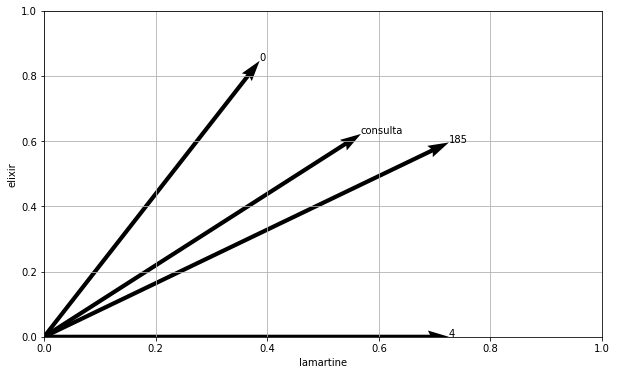

In [28]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
docs = 3
vecs = [qv[:2]]
for d in resposta[:docs]:
    vecs.append(MN[d[1]][:2])
    x,y = MN[d[1]][:2]
    plt.text(x,y,'{}'.format(d[1]))
U, V = zip(*vecs)
x,y = zeros(docs+1), zeros(docs+1)
plt.text(U[0],V[0],'consulta')
plt.grid()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('lamartine')
ax.set_ylabel('elixir')
ax.quiver(x,y,U,V,angles='xy',scale_units='xy', scale=1.0);

Usando o Gensim
---------------

O Gensim é uma biblioteca em Python para modelagem de assuntos. Contudo ele oferece uma série de outras ferramentas muito úteis para outros tipos de problemas em *Recuperação de informação*
https://radimrehurek.com/gensim/index.html

In [29]:
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from nltk.stem.snowball import PortugueseStemmer
from collections import Counter
from string import punctuation

In [35]:
sw = stopwords.words('portuguese')+ list(punctuation)
stemmer = PortugueseStemmer()

In [38]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Como aprendemos na prática 1, vamos tokenizar, normalizar e remover *stopwords* dos textos.

In [44]:
textos_limpos = []
c = Counter([])
for texto in textos:
    tlimpo = [stemmer.stem(token.strip(punctuation).lower()) for token in WordPunctTokenizer().tokenize(texto) if token not in sw]
    c.update(tlimpo)
    textos_limpos.append(tlimpo)
textos_limpos = [[token for token in t if c[token]>1] for t in textos_limpos]

In [45]:
dicionario = corpora.Dictionary(textos_limpos)
dicionario.save('vocabulario.dict')
print(dicionario)

Dictionary(18033 unique tokens: ['', '10', '11', '15', '186']...)


In [43]:
#dicionario.dfs
'...!!!!...***'.strip(punctuation)

''

In [50]:
#print(dicionario.token2id)

In [58]:
corpus = [dicionario.doc2bow(d) for d in textos_limpos]

In [59]:
corpora.MmCorpus.serialize('machado.mm', corpus)

In [66]:
lsi = models.LsiModel(corpus, id2word=dicionario, num_topics=4)

In [67]:
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [75]:
qt = [stemmer.stem(t) for t in WordPunctTokenizer().tokenize(q.lower())]
print(qt)
vec_bow = dicionario.doc2bow(qt)
vec_lsi = lsi[vec_bow] # convert the query to LSI space   
vec_lsi

['lamartin', 'elix', 'harp']


[(0, 0.0015030200146753624),
 (1, 0.0012855093785541435),
 (2, 0.0015506342041337478),
 (3, -0.0012650398751098265)]

In [77]:
sims = index[vec_lsi] # perform a similarity query against the corpus
# print(list(enumerate(sims))) # print (document_number, document_similarity) 2-tuples
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

[(199, 0.85357857), (169, 0.849339), (203, 0.8162579), (173, 0.7970059), (166, 0.78722835), (167, 0.7862006), (142, 0.7847142), (161, 0.77773505), (157, 0.7710332), (175, 0.76428616), (186, 0.76417184), (201, 0.76398015), (146, 0.76395464), (214, 0.7620225), (195, 0.7588766), (152, 0.7427852), (207, 0.7381786), (165, 0.7350827), (145, 0.734775), (193, 0.7318572), (158, 0.73079103), (153, 0.7298993), (184, 0.72735465), (176, 0.7225067), (77, 0.7200321), (151, 0.71984017), (156, 0.717278), (181, 0.7162174), (172, 0.7124518), (190, 0.71110207), (160, 0.7009272), (215, 0.6980771), (200, 0.697258), (182, 0.6959387), (194, 0.693673), (138, 0.6918683), (196, 0.6902097), (154, 0.6896333), (198, 0.6873334), (141, 0.68126965), (189, 0.68025184), (170, 0.6794078), (137, 0.67792404), (147, 0.677268), (191, 0.6722902), (164, 0.6714906), (188, 0.66662747), (163, 0.66610295), (144, 0.6644528), (235, 0.66191435), (162, 0.6617066), (140, 0.66114706), (212, 0.6606803), (185, 0.65935546), (111, 0.6556303

In [70]:
lsi.show_topics()

[(0,
  '0.480*"é" + 0.293*"\x97" + 0.238*"" + 0.207*"outr" + 0.173*"a" + 0.168*"nã" + 0.157*"o" + 0.144*"tod" + 0.143*"pod" + 0.120*"cas"'),
 (1,
  '-0.889*"" + 0.226*"é" + -0.167*"diss" + 0.135*"\x97" + -0.116*"oliv" + -0.077*"sr" + 0.068*"outr" + 0.061*"\x93" + 0.055*"\x94" + -0.045*"jud"'),
 (2,
  '-0.761*"\x97" + 0.385*"é" + -0.118*"mar" + -0.116*"diss" + -0.103*"rubiã" + 0.096*"" + -0.095*"capítul" + -0.092*"cas" + 0.076*"\x93" + -0.072*"mã"'),
 (3,
  '0.399*"gilliatt" + 0.355*"o" + 0.257*"a" + 0.199*"mar" + -0.156*"\x97" + 0.153*"águ" + 0.148*"lethierry" + 0.140*"vent" + -0.117*"outr" + 0.114*"clubin"')]